# Chapter 13

In [23]:
# Import numpy
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Create function to calculate tree population over time using matrix multiplication
def tree_population(initial_population_vector, years):
    #Initialize the transition Matrix A
    A = np.array([[0.8, 0.25, 0.1],[0.1, 0.15, 0.25], [0.1, 0.6, 0.65]])
    #Initialize the population vector with the initial population
    n_t = initial_population_vector


    Beech = []
    Maple = []
    Other = []
    # Append the initial populations to the respective lists
    Beech.append(initial_population_vector[0])
    Maple.append(initial_population_vector[1])
    Other.append(initial_population_vector[2])
    # Loop through the number of years to calculate the populations
    n_t = initial_population_vector
    for year in range(years):
        # Calculate the population for the next year using matrix multiplication
        n_t = np.dot(A, n_t)
        # Append the populations to the respective lists
        Beech.append(n_t[0])
        Maple.append(n_t[1])
        Other.append(n_t[2])
    # Return the populations of each age group and total population over the years
    return Beech, Maple, Other

    

In [25]:
# Plot populations produced by tree_population()

years = 50
np.array([1, 20, 79])  # Initial populations for saplings, juveniles, adults
#call function
Beech, Maple, Other = tree_population(np.array([1, 20, 79]), years)

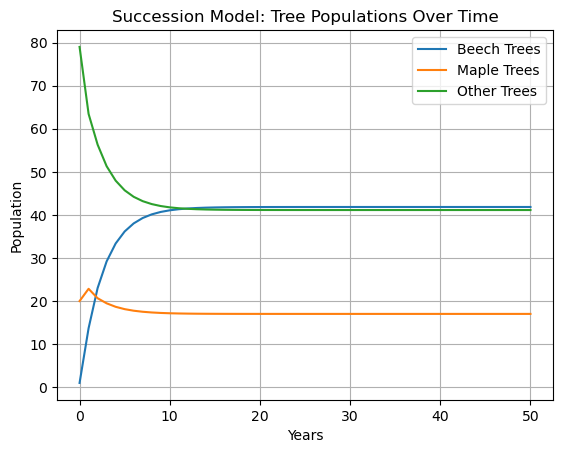

In [26]:
#plot the populations over the years
import matplotlib.pyplot as plt
years = list(range(51))
plt.plot(years, Beech, label='Beech Trees')
plt.plot(years, Maple, label='Maple Trees')
plt.plot(years, Other, label='Other Trees')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Succession Model: Tree Populations Over Time')
plt.legend()
plt.grid()
plt.show()

# Chapter 13 Questions
1. What is the stationary state distribution of this population?
- The Stationary State Distribution is: **[0.41843972 0.17021277 0.41134752]**.

1. What is the probability that a randomly selected individual from this population at year 50 is a Maple?
- The probablilty that a randomly selected individual is a Maple is **0.17021277** or **17%**.

Work is provided below

In [36]:
# What is the stationary state distribution of this population?
finals_totals = np.array([Beech[-1], Maple[-1], Other[-1]])
stationary_distribution = finals_totals / np.sum(finals_totals)
print("Stationary State Distribution:", stationary_distribution)

Stationary State Distribution: [0.41843972 0.17021277 0.41134752]


# Chapter 14

In [37]:
# Create a function to calculate the possibility of local extinction and recolonization within a metapopulation, accounting for absorbtion states.
def metapopulation_dynamics(initial_patches, colonization_rate, extinction_rate, years):
    # Initialize lists to store the number of occupied patches over time
    occupied_patches = []
    n_t = initial_patches
    occupied_patches.append(n_t)
    for year in range(years):
        # Calculate the number of occupied patches for the next year
        n_t = n_t + colonization_rate * n_t * (1 - n_t) - extinction_rate * n_t
        occupied_patches.append(n_t)
    return occupied_patches


In [38]:
# z = zero or extinct
# p = populated
z_z = 0
z_p = 0
p_z = 0
p_p = 1
initial_population = [z_z, z_p, p_z, p_p]

In [39]:
#Initialize the transition Matrix A
A = np.array([[1, 0.029, 0.13, 0.0039],[0, 0.95, 0.0026, 0.13], [0, 0.0006, 0.85, 0.0026], [0, 0.019, 0.017, 0.84]])


[[0, 0, 0, 1], array([0.0039, 0.13  , 0.0026, 0.84  ]), array([0.011284  , 0.23270676, 0.004472  , 0.7081142 ]), array([0.0213755 , 0.3131379 , 0.00578192, 0.59931338]), array([0.03354547, 0.37540677, 0.00666073, 0.50947115]), array([0.0472851 , 0.422885  , 0.00721149, 0.43520173]), array([0.06218355, 0.45833573, 0.00751502, 0.37372686]), array([0.07790977, 0.48402297, 0.00763446, 0.3227667 ]), array([0.09419771, 0.50180134, 0.0076189 , 0.28045025]), array([0.11083416, 0.51318962, 0.00750631, 0.24524196]), array([0.12764892, 0.51943111, 0.00732591, 0.21588145]), array([0.14450673, 0.52154319, 0.00709997, 0.19133415]), array([0.16130068, 0.52035793, 0.00684537, 0.17075071]), array([0.17794689, 0.51655542, 0.00657473, 0.15343377]), array([0.1943801 , 0.51069114, 0.00629738, 0.13881069]), array([0.21055017, 0.50321834, 0.0060201 , 0.12641116]), array([0.22641912, 0.49450653, 0.00574768, 0.11584887]), array([0.24195881, 0.4848565 , 0.00548344, 0.10680638]), array([0.25714905, 0.47451276, 0

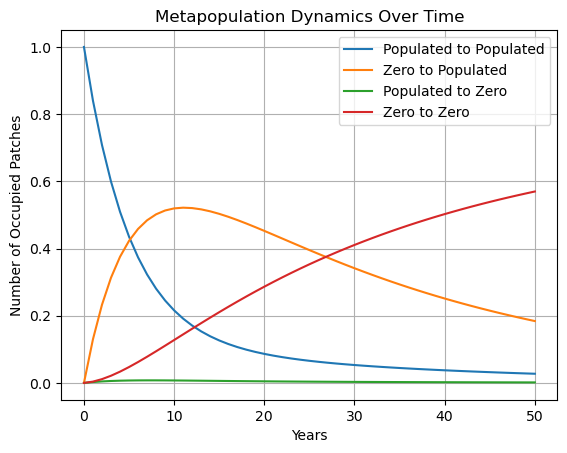

In [40]:
# use our matrix to project the state of our metapopulation into the future using the equation pt+1 = Apt
years = 50
n_t = initial_population
occupied_patches = []
occupied_patches.append(n_t)
for year in range(years):
    n_t = np.dot(A, n_t)
    occupied_patches.append(n_t)
print(occupied_patches)
# Plot the number of occupied patches over time
import matplotlib.pyplot as plt
years = list(range(51))
plt.plot(years, [state[3] for state in occupied_patches], label='Populated to Populated')
plt.plot(years, [state[1] for state in occupied_patches], label='Zero to Populated')
plt.plot(years, [state[2] for state in occupied_patches], label='Populated to Zero')
plt.plot(years, [state[0] for state in occupied_patches], label='Zero to Zero')
plt.xlabel('Years')
plt.ylabel('Number of Occupied Patches')
plt.title('Metapopulation Dynamics Over Time')
plt.legend()
plt.grid()
plt.show()

# Chapter 14 Questions
1. What is the probability that both plots will be extinct after 50 years?
- The probability that both plots will be extinct after 50 years is: **0.5697156198085335** or **57%**.

In [41]:
# What is the probability that both plots will be extinct after 50 years?
extinction_probability = occupied_patches[-1][0]
print("Probability that both plots will be extinct after 50 years:", extinction_probability)

Probability that both plots will be extinct after 50 years: 0.5697156198085335
